# 数据读取

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

train_set = pd.read_csv('train_set.csv', sep = '\t')
train_set.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


# 数据分析
1. 新闻文本的长度
2. 新闻类别分布
3. 字符分布

In [3]:
# 1.新闻文本的长度
train_set['text_len'] = train_set['text'].apply(lambda x: len(x.split(' ')))
train_set['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

可以看出赛题给的文本较长。新闻文本长度平均是907个字符，最短2字符，最长57921字符。  
绘制直方图如下：

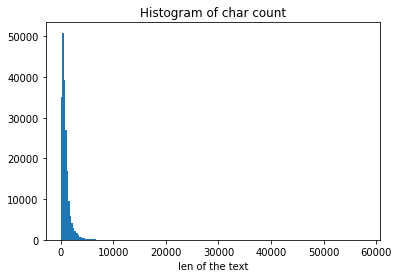

In [4]:
plt.hist(train_set['text_len'], bins = 200)
plt.title('Histogram of char count')
plt.xlabel('len of the text')
plt.show()

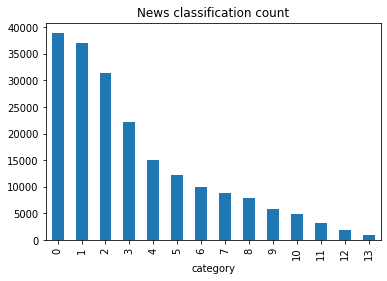

In [5]:
# 2.新闻类别分布
train_set['label'].value_counts().plot(kind='bar')
plt.title('News classification count')
plt.xlabel('category')
plt.show()

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}  
从上图可以看出，数据集的类别分布不均，训练集中科技类新闻最多，其次是股票类新闻，最少的是星座类新闻。

In [6]:
# 3.字符分布统计
# 将训练集中所有句子拼接在一起，再划分为字符，并统计每个字符的个数
from collections import Counter
all_chars = ' '.join(list(train_set['text']))
chars_count = Counter(all_chars.split(' '))
chars_count = sorted(chars_count.items(), key = lambda x:x[1], reverse = True)
print(len(chars_count))

6869


In [8]:
print(chars_count[0])
print(chars_count[-1])

('3750', 7482224)
('3133', 1)


从结果可以看出，训练集中共有6869个字，其中编号为3750的字出现次数最多，编号为3133的字出现次数最少。  

In [10]:
train_set['text_unique'] = train_set['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
uniq_char = ' '.join(list(train_set['text_unique']))
chars_count = Counter(uniq_char.split(' '))
chars_count = sorted(chars_count.items(), key = lambda x:x[1], reverse = True)
print(chars_count[0])
print(chars_count[1])
print(chars_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


In [12]:
print(chars_count[3])

('2465', 177310)


上面统计不同字符在句子中出现的次数，其中编号3750、编号900和编号648在20w条新闻的覆盖率接近99%，很有可能是标点符号。

# 数据分析的结论
1. 赛题中每个新闻包含的字符个数平均为907个，有少数新闻字符较长，可能需要截断；
2. 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不足1k，可能影响模型精度；

# 本章作业
1. 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
2. 统计每类新闻中出现次数最多的字符

In [19]:
# 第一问 python里的split不能多条件分割，故这里引入re模块
import re
train_set['sentence_list'] = train_set['text'].apply(lambda x: re.split('3750|900|648', x))
# 分割句子后去空格
train_set['sentence_num'] = train_set['sentence_list'].apply(lambda x: len(list(filter(None, [i.strip() for i in x]))))
train_set['sentence_num'].describe()

count    200000.000000
mean         79.466030
std          85.383165
min           1.000000
25%          28.000000
50%          56.000000
75%         102.000000
max        3393.000000
Name: sentence_num, dtype: float64

可知赛题每篇新闻平均由79个句子构成，最少有1个句子，最多有3393个句子。

In [22]:
# 第二问 
# 对每类新闻字符拼接
label_word = train_set.groupby('label')['text'].apply(lambda x: x.str.cat(sep = ' ')).reset_index()
# 过滤标点符号
label_word['text'] = label_word['text'].apply(lambda x: re.sub('3750 | 3750|900 | 900|648 | 648', '', x))
# 统计每类新闻相同字符个数
label_word['word_count'] = label_word['text'].apply(lambda x: Counter(x.split(' ')))
# 降序
label_word['word_count'] = label_word['word_count'].apply(lambda x: sorted(x.items(), key = lambda a: a[1], reverse = True))
# 统计每类新闻中出现次数最多的字符
label_word['word_most'] = label_word['word_count'].apply(lambda x: x[0])

In [24]:
label_word[['label', 'word_most']]

,label,word_most
0,0,"(3370, 501743)"
1,1,"(3370, 625227)"
2,2,"(7399, 351630)"
3,3,"(6122, 187767)"
4,4,"(4411, 120314)"
5,5,"(6122, 159073)"
6,6,"(6248, 193521)"
7,7,"(3370, 158886)"
8,8,"(6122, 57282)"
9,9,"(7328, 46451)"


统计得出，除标点符号外，编号3370在`科技`、`股票`、`财经`和`房产`这四类新闻中出现次数最多。